In [32]:
import pandas as pd
from textblob import TextBlob   
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
#import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
#import tensorflow as tf
#import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
print('Done')

Done


In [11]:
dfn = pd.read_csv("nikol.csv")

In [12]:
dfn.dropna()
dfn['Tweets'] = dfn['Tweets'].str.replace('https', '')

dfn['polarity'] = dfn['Tweets'].apply(lambda x: TextBlob(x).polarity)

label = []
for pol in dfn['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
        
dfn['label'] = label

In [13]:
dfe = pd.read_csv('marukyan.csv')
dfe.dropna()
dfe['Tweets'] = dfe['Tweets'].str.replace('https', '')

dfe['polarity'] = dfe['Tweets'].apply(lambda x: TextBlob(x).polarity)

label = []
for pol in dfe['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
        
dfe['label'] = label

In [14]:
dfa = pd.read_csv('mirzoyan.csv')
dfa.dropna()
dfa['Tweets'] = dfa['Tweets'].str.replace('https', '')

dfa['polarity'] = dfa['Tweets'].apply(lambda x: TextBlob(x).polarity)

label = []
for pol in dfa['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')
        
        
dfa['label'] = label

In [15]:
all = pd.concat([dfn, dfe,dfa])

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(all, test_size=0.2)

In [17]:
train['label'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [18]:
train.groupby('label').nunique()

,Date Created,Number of Likes,Source of Tweet,Tweets,polarity,label
label,,,,,,
negative,236,131,4,239,113,1
neutral,1131,264,4,1209,1,1
positive,692,291,4,711,312,1


In [19]:
train = train[['Tweets','label']]
train.head()

,Tweets,label
1291,Դա հնավոր էր անել համավարակի առկայության պայմա...,neutral
135,"Had a meeting with @morton_wendy today, where ...",neutral
88,"Why AZ is punishing 120K people of NK, includi...",positive
626,We welcome the statement of @ExtSpoxEU! Detent...,positive
447,"On July 29, starting from 11:00 pm, the air de...",neutral


In [20]:
train["Tweets"].isnull().sum()

0

In [21]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [22]:
temp = []
#Splitting pd.Series to list
data_to_list = train['Tweets'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Դա հնավոր էր անել համավարակի առկայության պայմաններում և նույնիսկ պարտադիր էր, քանի որ մենք ամեն օր չենք նշում Անկախության հռչակագրի 30-ամյակը։ Ինչևիցե... շնորհավորում եմ բոլորիս, ինչպես հայաստանցիներին, այնպես էլ աշխարհասփյուռ հայությանը այս բացառիկ տոնի առթիվ։',
 'Had a meeting with today, where I mentioned that none of the global powers can stay indifferent to the issue of the immediate return of #Armenian prisoners of war from #Azerbaijan. ://t.co/Htd6IBeWlY',
 'Why AZ is punishing 120K people of NK, including 30K children? I insist that AZ is doing this to NK for its democratic choice, which sustains for 30 years already. Today NK has no gas and totally blocked. NK Armenians are waiting for the reaction &amp; real steps from int. community. ://t.co/QBFjOtUXI3',
 'We welcome the statement of Detention of Armenian POWs by Azerbaijan is a war crime! We demand the immediate release of Armenian prisoners of war and civilians held captive in Azerbaijan, as well as special attention of 

In [23]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['դա', 'հնավոր', 'էր', 'անել', 'համավարակի', 'առկայության', 'պայմաններում', 'նույնիսկ', 'պարտադիր', 'էր', 'քանի', 'որ', 'մենք', 'ամեն', 'օր', 'չենք', 'նշում', 'անկախության', 'հռչակագրի', 'ամյակը', 'ինչևիցե', 'շնորհավորում', 'եմ', 'բոլորիս', 'ինչպես', 'հայաստանցիներին', 'այնպես', 'էլ', 'աշխարհասփյուռ', 'հայությանը', 'այս', 'բացառիկ', 'տոնի', 'առթիվ'], ['had', 'meeting', 'with', 'today', 'where', 'mentioned', 'that', 'none', 'of', 'the', 'global', 'powers', 'can', 'stay', 'indifferent', 'to', 'the', 'issue', 'of', 'the', 'immediate', 'return', 'of', 'armenian', 'prisoners', 'of', 'war', 'from', 'azerbaijan', 'co', 'htd', 'ibewly'], ['why', 'az', 'is', 'punishing', 'people', 'of', 'nk', 'including', 'children', 'insist', 'that', 'az', 'is', 'doing', 'this', 'to', 'nk', 'for', 'its', 'democratic', 'choice', 'which', 'sustains', 'for', 'years', 'already', 'today', 'nk', 'has', 'no', 'gas', 'and', 'totally', 'blocked', 'nk', 'armenians', 'are', 'waiting', 'for', 'the', 'reaction', 'amp', 'r

In [25]:
len(data_words)

2164

In [26]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [27]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['դա հնավոր էր անել համավարակի առկայության պայմաններում նույնիսկ պարտադիր էր քանի որ մենք ամեն օր չենք նշում անկախության հռչակագրի ամյակը ինչևիցե շնորհավորում եմ բոլորիս ինչպես հայաստանցիներին այնպես էլ աշխարհասփյուռ հայությանը այս բացառիկ տոնի առթիվ', 'had meeting with today where mentioned that none of the global powers can stay indifferent to the issue of the immediate return of armenian prisoners of war from azerbaijan co htd ibewly', 'why az is punishing people of nk including children insist that az is doing this to nk for its democratic choice which sustains for years already today nk has no gas and totally blocked nk armenians are waiting for the reaction amp real steps from int community co qbfjotuxi', 'we welcome the statement of detention of armenian pows by azerbaijan is war crime we demand the immediate release of armenian prisoners of war and civilians held captive in azerbaijan as well as special attention of the international community to this issue', 'on july starting 

In [28]:
data = np.array(data)

In [34]:
labels = np.array(train['label'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [35]:
len(labels)

2164

## Data sequencing and splitting

In [39]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 1537 2795 1538]
 [   0    0    0 ...    4 4545 4546]
 [   0    0    0 ...   54    4 4550]
 ...
 [   0    0    0 ...   76  466    4]
 [   0    0    0 ...  357  517  794]
 [   0    0    0 ...  456    4 4524]]


In [40]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

1623 541 1623 541


## Single LSTM layer model

In [42]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
51/51 [==============================] - ETA: 0s - loss: 0.9202 - accuracy: 0.5662
Epoch 1: val_accuracy improved from -inf to 0.55638, saving model to best_model1.hdf5
51/51 [==============================] - 17s 206ms/step - loss: 0.9202 - accuracy: 0.5662 - val_loss: 0.8379 - val_accuracy: 0.5564
Epoch 2/70
51/51 [==============================] - ETA: 0s - loss: 0.7486 - accuracy: 0.6913
Epoch 2: val_accuracy improved from 0.55638 to 0.73383, saving model to best_model1.hdf5
51/51 [==============================] - 8s 154ms/step - loss: 0.7486 - accuracy: 0.6913 - val_loss: 0.7401 - val_accuracy: 0.7338
Epoch 3/70
51/51 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.7147
Epoch 3: val_accuracy did not improve from 0.73383
51/51 [==============================] - 8s 158ms/step - loss: 0.6993 - accuracy: 0.7147 - val_loss: 0.7448 - val_accuracy: 0.6969
Epoch 4/70
51/51 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.7277
Epoc

## Bidirectional LSTM model

In [43]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/70
51/51 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.5853
Epoch 1: val_accuracy improved from -inf to 0.70980, saving model to best_model2.hdf5
51/51 [==============================] - 19s 219ms/step - loss: 0.8949 - accuracy: 0.5853 - val_loss: 0.8070 - val_accuracy: 0.7098
Epoch 2/70
51/51 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.7073
Epoch 2: val_accuracy improved from 0.70980 to 0.72828, saving model to best_model2.hdf5
51/51 [==============================] - 8s 147ms/step - loss: 0.7287 - accuracy: 0.7073 - val_loss: 0.7128 - val_accuracy: 0.7283
Epoch 3/70
51/51 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.7172
Epoch 3: val_accuracy improved from 0.72828 to 0.73937, saving model to best_model2.hdf5
51/51 [==============================] - 8s 151ms/step - loss: 0.6891 - accuracy: 0.7172 - val_loss: 0.6819 - val_accuracy: 0.7394
Epoch 4/70
51/51 [==============================] - ETA: 0s 

## 1D Convolutional model

In [44]:
from keras import regularizers
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(3,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint3])

Epoch 1/70
51/51 [==============================] - 4s 43ms/step - loss: 1.6666 - acc: 0.5705 - val_loss: 1.3625 - val_acc: 0.5323
Epoch 2/70
51/51 [==============================] - 1s 24ms/step - loss: 1.1648 - acc: 0.5699 - val_loss: 1.0526 - val_acc: 0.5323
Epoch 3/70
51/51 [==============================] - 1s 19ms/step - loss: 0.9544 - acc: 0.6470 - val_loss: 0.9220 - val_acc: 0.6932
Epoch 4/70
51/51 [==============================] - 1s 20ms/step - loss: 0.8823 - acc: 0.6901 - val_loss: 0.8812 - val_acc: 0.6987
Epoch 5/70
51/51 [==============================] - 1s 23ms/step - loss: 0.8522 - acc: 0.7018 - val_loss: 0.8536 - val_acc: 0.7043
Epoch 6/70
51/51 [==============================] - 2s 30ms/step - loss: 0.8290 - acc: 0.7055 - val_loss: 0.8430 - val_acc: 0.7006
Epoch 7/70
51/51 [==============================] - 1s 24ms/step - loss: 0.8085 - acc: 0.7086 - val_loss: 0.8255 - val_acc: 0.7209
Epoch 8/70
51/51 [==============================] - 1s 23ms/step - loss: 0.7901 - a

## Model validation

In [46]:
best_model = keras.models.load_model("best_model2.hdf5")

In [47]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

17/17 - 3s - loss: 0.5798 - accuracy: 0.7837 - 3s/epoch - 183ms/step
Model accuracy:  0.7837338447570801


In [48]:
predictions = best_model.predict(X_test)

17/17 [==============================] - 2s 39ms/step


In [49]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

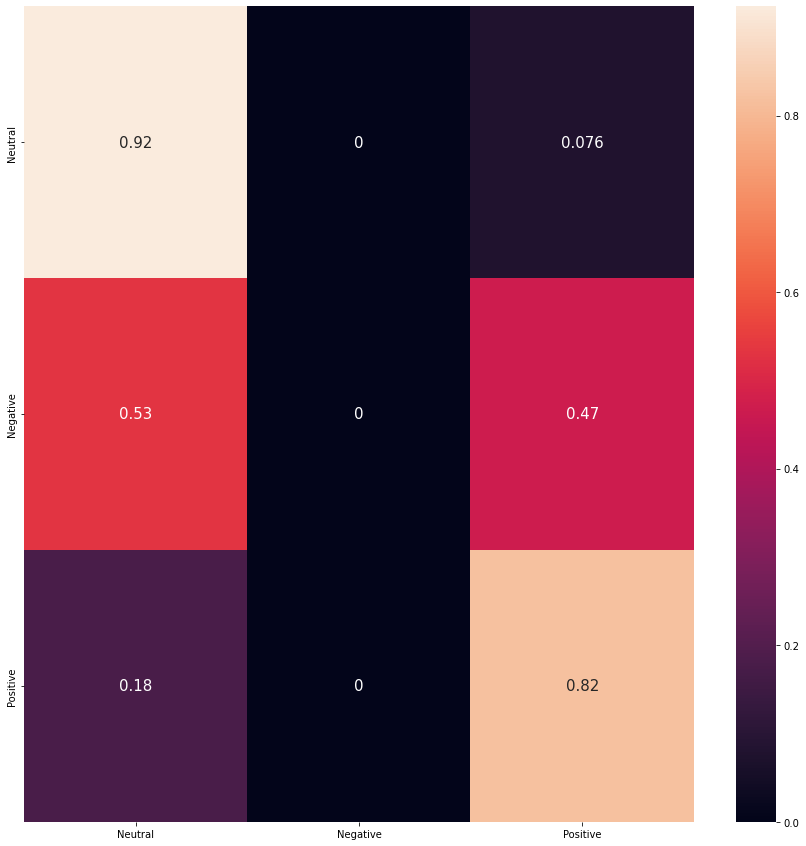

In [120]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
plt.savefig('confmatrix.png')